In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['15'][1]
models = []
scalers = []
all_dummies = []

# Example of how chained models were built for testing

For every stop in the route, a model and two scalers are constructed and saved.

In [2]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['15'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 6318 to 6319


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 6318 to 6319
min pred: 19.516875039223436
mean pred: 24.598000018701605
max pred: 34.10709709203452
Mape: 17.685751056568087
r2: -0.0031096467348941115
mae: 4.99578220007617 


Building for 6319 to 7246
model for: 6319 to 7246
min pred: 27.738054618905217
mean pred: 42.540075208456926
max pred: 64.74629632303018
Mape: 28.612747010386826
r2: 0.0022824556835080445
mae: 11.471710149870132 


Building for 7246 to 6320
model for: 7246 to 6320
min pred: 69.23467012126758
mean pred: 89.37124704158907
max pred: 116.3455521764646
Mape: 19.267537341519862
r2: -0.01499893648573547
mae: 19.825989440195777 


Building for 6320 to 4594
model for: 6320 to 4594
min pred: 26.866678088039436
mean pred: 91.67239148456022
max pred: 193.28870443969004
Mape: 28.722020372028933
r2: 0.16814071247100992
mae: 26.33813452174216 


Building for 4594 to 4595
model for: 4594 to 4595
min pred: 68.68254974898099
mean pred: 93.29999055367009
max pred: 111.60304200359147
Mape: 15.81175782999471
r2: 0.1070557

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 4495 to 7581
min pred: 149.00260158197915
mean pred: 268.9129704152297
max pred: 335.7133739819631
Mape: 53.65505081120451
r2: -0.48526240554861966
mae: 86.27308147029267 


Building for 7581 to 1283
model for: 7581 to 1283
min pred: 82.85723334197718
mean pred: 136.76325608883928
max pred: 183.32754277749908
Mape: 21.820333531510908
r2: 0.23948992432323934
mae: 28.623531751747077 


Building for 1283 to 7579
model for: 1283 to 7579
min pred: 75.50760685850264
mean pred: 124.65112704310462
max pred: 165.13596987774855
Mape: 22.853630037432378
r2: 0.19496623003399005
mae: 26.598734536330962 


Building for 7579 to 1285
model for: 7579 to 1285
min pred: -2.2215029313992716
mean pred: 148.42468017385806
max pred: 237.65841284151531
Mape: 28.84570879968028
r2: -0.0933724900234596
mae: 35.55721826659517 


Building for 1285 to 1016
model for: 1285 to 1016
min pred: 36.658664500195584
mean pred: 151.219010087248
max pred: 204.44022921914933
Mape: 23.89704209318817
r2: 0.1254053907

Then a method is constructed to retrieve the data for the first stop on the route, and the data for the nth stop on the route

In [3]:
def get_merged(stop):
    route = routes['15'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

A function is then constructed to run all busses in the data frame from the beginning of the route to the nth stop. The resulting arrival time is compared against the traveltime returned by the merged() function. The r2 scores and mape are outputted.

In [4]:
def run_to_stop(number,verbose=False):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [24]:
len(route)

71

The run to stop function is executed on every stop on the route except for the first one.

In [5]:

MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,67):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
229.62746810913086


The overall MAPE is calculated

In [10]:
sum(MAPES)/len(MAPES)

12.402356471128059

Graphs are constructed showing how the MAPE broadly decreases over the length of the route, and the r2 score increases.

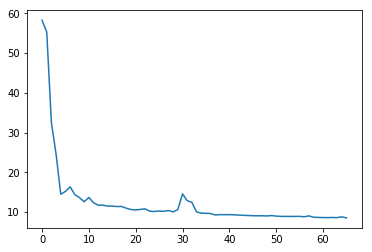

In [11]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

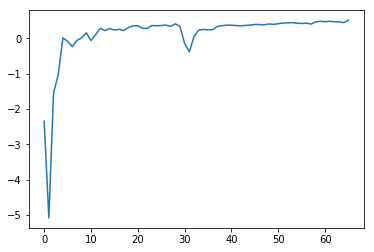

In [12]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


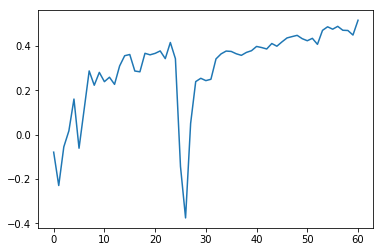

In [13]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s[5:])),r2s[5:])


In [14]:
max(r2s)

0.5154449065155686